In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.io.votable import parse
from matplotlib.colors import LogNorm
from matplotlib import rc

from astroquery.gaia import Gaia

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 20}	
rc('font', **font)

Queries to use on the Gaia archive: https://gea.esac.esa.int/archive/ 
(saved as .vot files)

### apparent magnitude, not extinction corrected

SELECT bp_rp_index / 40 AS bp_rp, g_abs_index / 10 AS g_abs, 
FROM (
  SELECT FLOOR((bp_rp) * 40) AS bp_rp_index, 
  FLOOR(phot_g_mean_mag) AS g_abs_index, 
  COUNT(*) AS n
  FROM gaiadr3.gaia_source
  WHERE parallax_over_error > 5
  AND ag_gspphot IS NOT NULL
  AND random_index < 500000
  GROUP BY bp_rp_index, g_abs_index
) AS subquery

### absolute magnitude, not extinction corrected

SELECT bp_rp_index / 40 AS bp_rp, g_abs_index / 10 AS g_abs, n
FROM (
  SELECT FLOOR((bp_rp) * 40) AS bp_rp_index, 
  FLOOR((phot_g_mean_mag + 5 * LOG10(parallax) - 10) * 10) AS g_abs_index, 
  COUNT(*) AS n
  FROM gaiadr3.gaia_source
  WHERE parallax_over_error > 5
  AND ag_gspphot IS NOT NULL
  AND random_index < 500000
  GROUP BY bp_rp_index, g_abs_index
) AS subquery

### absolute magnitude, extinction corrected

SELECT bp_rp_index / 40 AS bp_rp, g_abs_index / 10 AS g_abs, n
FROM (
  SELECT FLOOR((bp_rp - ebpminrp_gspphot) * 40) AS bp_rp_index, 
  FLOOR((phot_g_mean_mag - ag_gspphot + 5 * LOG10(parallax) - 10) * 10) AS g_abs_index, 
  COUNT(*) AS n
  FROM gaiadr3.gaia_source
  WHERE parallax_over_error > 5
  AND ag_gspphot IS NOT NULL
  AND random_index < 500000
  GROUP BY bp_rp_index, g_abs_index
) AS subquery

In [8]:
apptab = parse("../gaiastuff/noext_apparent.vot")   ## apparent magnitude, not extinction corrected
app = apptab.get_first_table() 

noexttab = parse("../gaiastuff/noext.vot")          ## absolute magnitude, not extinction corrected
noext = noexttab.get_first_table() 

exttab = parse("../gaiastuff/ext.vot")              ## absolute magnitude,  extinction corrected
ext = exttab.get_first_table() 

### what does the content look like? 
print(ext)

bp_rp  g_abs  n 
------ ----- ---
-0.525  -4.6   1
  -0.5  -6.9   1
-0.425  -2.4   1
-0.375   9.7   1
-0.325  -1.6   1
  -0.3  -3.6   1
  -0.3  -2.0   1
  -0.3  -1.8   1
  -0.3  -1.6   1
  -0.3  10.8   1
   ...   ... ...
  3.15  12.0   1
 3.175  12.2   1
 3.175  12.9   1
 3.225  11.2   1
  3.25  12.6   1
 3.275  12.6   1
 3.325  11.3   1
 3.325  11.8   1
 3.325  12.1   1
 3.425  12.3   1
 4.425  14.0   1
Length = 4987 rows


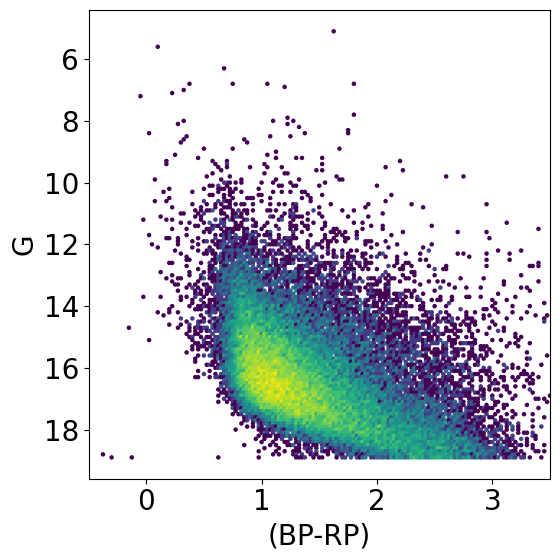

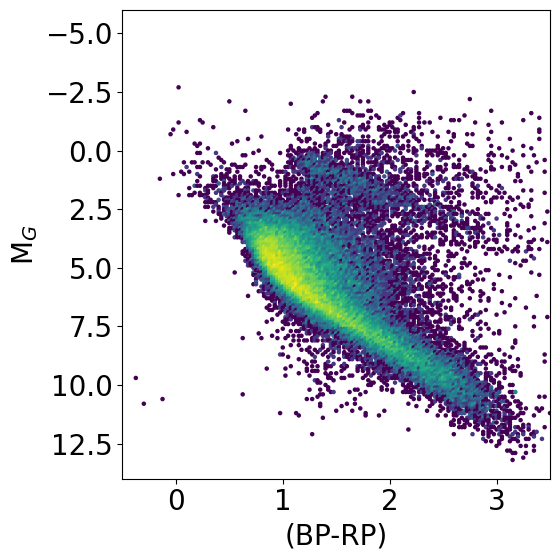

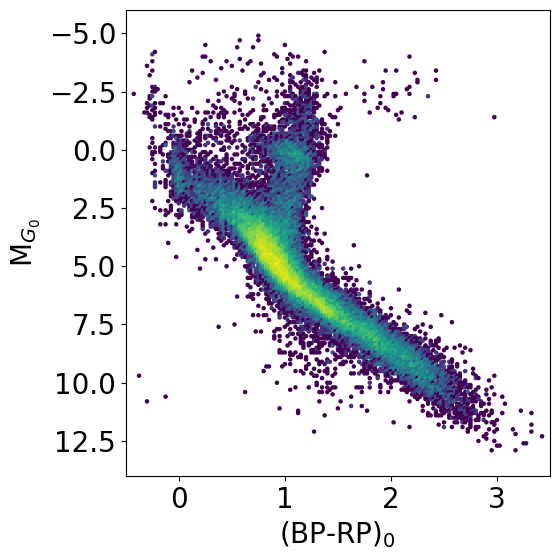

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(app.array['bp_rp'], app.array['g_abs'], s=5, c=app.array['n'],
            norm=LogNorm(), rasterized=True)
plt.gca().invert_yaxis()

plt.xlim(-0.5, 3.5)
# plt.ylim(14,-6)

plt.xlabel('(BP-RP)')
plt.ylabel('G')

plt.tight_layout()
plt.savefig('figures/cmd-apparent.pdf', dpi=150)
plt.show()

### -----------


plt.figure(figsize=(6,6))
plt.scatter(noext.array['bp_rp'], noext.array['g_abs'], s=5, c=noext.array['n'],
            norm=LogNorm(), rasterized=True)
plt.gca().invert_yaxis()

plt.xlim(-0.5, 3.5)
plt.ylim(14,-6)

plt.xlabel('(BP-RP)')
plt.ylabel('M$_{G}$')

plt.tight_layout()
plt.savefig('figures/cmd-noext.pdf', dpi=150)
plt.show()

### -----------


plt.figure(figsize=(6,6))
plt.scatter(ext.array['bp_rp'], ext.array['g_abs'], s=5, c=ext.array['n'],
            norm=LogNorm(), rasterized=True)
plt.gca().invert_yaxis()

plt.xlim(-0.5, 3.5)
plt.ylim(14,-6)

plt.xlabel('(BP-RP)$_0$')
plt.ylabel('M$_{G_0}$')

plt.tight_layout()
plt.savefig('figures/cmd.pdf', dpi=150)
plt.show()